<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Megaline-User-Plans" data-toc-modified-id="Megaline-User-Plans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Megaline User Plans</a></span><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>General Information</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-Conclusion" data-toc-modified-id="Final-Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Final Conclusion</a></span></li></ul></li></ul></div>

# Megaline User Plans

## General Information

In [1]:
import pandas as pd
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
users=pd.read_csv('/datasets/users_behavior.csv')
display(users)
dupst =  users[users.duplicated()]
print(dupst)
print(users.isnull().sum())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Empty DataFrame
Columns: [calls, minutes, messages, mb_used, is_ultra]
Index: []
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


### Conclusion
This is looking at the general information of the dataset. The duplicated method checks if there are any duplicates in the dataset, while the isnull() method checks if there are any missing values in the dataset. Missing values would make it difficult to train the model accurately. Both of these methods result in empty values, signfiying that the dataset does not contain any duplicates or missing values.

## Model Testing

   depth  accuracy        f1
6      7  0.774495  0.691165
9     10  0.771384  0.709910
7      8  0.766719  0.685339
2      3  0.765163  0.678386
3      4  0.763608  0.678382


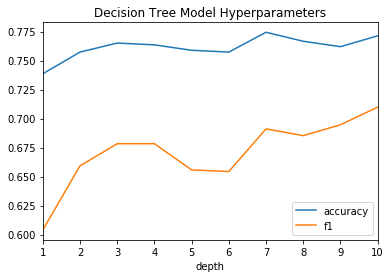

In [2]:
u_train, u_test = train_test_split(users, test_size=0.2, random_state=12345)
u_train, u_valid = train_test_split(u_train,test_size=0.25,random_state=12345)

features_t = u_train.drop(['is_ultra'],axis=1)
target_t = u_train['is_ultra']

features_v = u_valid.drop(['is_ultra'],axis=1)
target_v= u_valid['is_ultra']

features= u_test.drop(['is_ultra'],axis=1)
target= u_test['is_ultra']

ddf_list = []  
for est in range(1,11,1):
        model= DecisionTreeClassifier(random_state=12345,max_depth=est)
        model.fit(features_t,target_t)
        prediction_v = model.predict(features_v)
        accuracy = accuracy_score(target_v, prediction_v)
        f1 = f1_score(target_v,prediction_v,average='macro')
        f1_m = f1_score(target_v,prediction_v,average='micro')
        ddf_list.append([est,accuracy,f1])
        ddf = pd.DataFrame(ddf_list, columns=['depth','accuracy','f1'])
            
print(ddf.sort_values(by='accuracy',ascending=False).head(5))

ddf.plot(x='depth', y=['accuracy','f1']);
plt.title('Decision Tree Model Hyperparameters')
plt.show()

### Conclusion
In order to tune the hyperparameters effectively, the scikit learn package train_test_split was used to turn the data into three parts. The training set(features_t, target_t) will be used to train the data and the validation set (features_v,target_v) will be used to evaluate the performance of the model for different combinations of hyperparameter values. The test set is the part of the data that will be used for the final model.

Tuning the hyperparameters of a decision tree (via max depth) the hyperparameters that produce the highest accuracy is depth 7 and depth 10. These satisfy the conditions that accuracy has to be above 0.75 as they are above 0.78. As shown by the graph, the accuracy peaks at depth 10 and depth 7, making them the best hyperparameters for a decision tree. 

Additionally the Macro F1 score assess the quality of the model based on a balance of precision and recall. In the graph depth 10 has a slightly higher F1 macro score than depth 7.

    estimators  depth  accuracy        f1
49          50     10  0.797823  0.728449
99         100     10  0.796267  0.728075
69          70     10  0.796267  0.726936
39          40     10  0.796267  0.728075
19          20     10  0.796267  0.729197


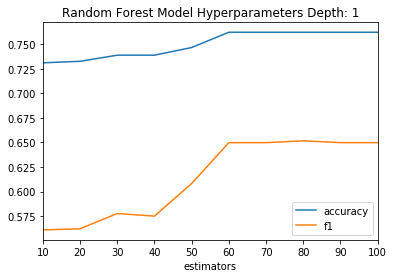

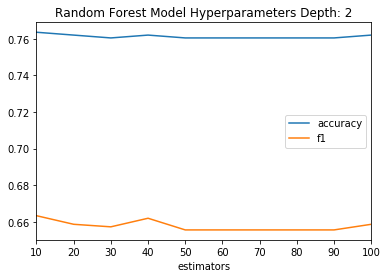

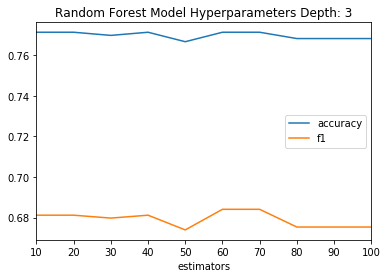

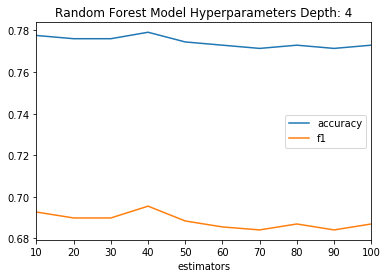

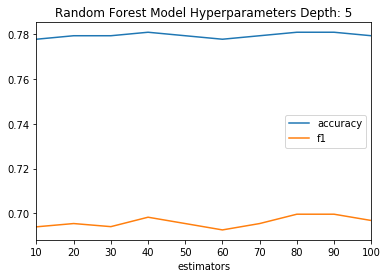

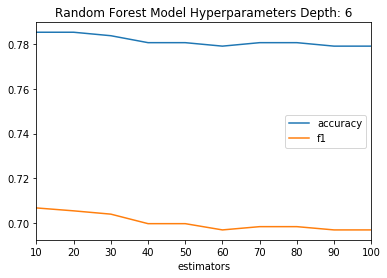

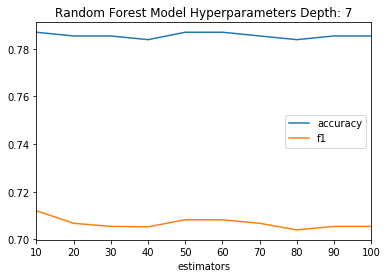

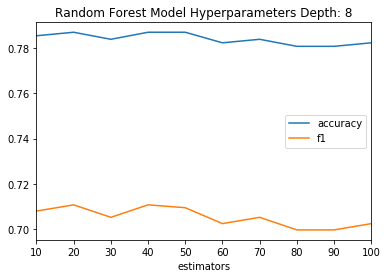

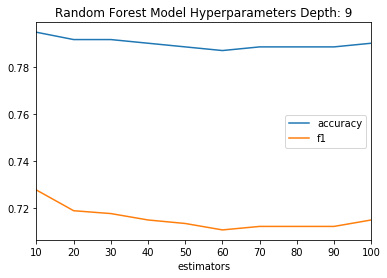

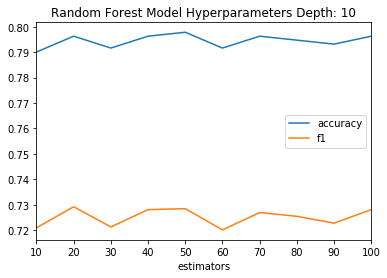

In [3]:
diag_list=[] 
for estimators, depth in itertools.product(range(10,101,10), range(1,11,1)):
    models= RandomForestClassifier(random_state=12345,n_estimators=estimators,max_depth=depth)
    models.fit(features_t,target_t)
    predictions_v = models.predict(features_v)
    accuracy = accuracy_score(target_v, predictions_v)
    f1 = f1_score(target_v,predictions_v,average='macro')
    f1_m = f1_score(target_v,predictions_v,average='micro')
    diag_list.append([estimators, depth, accuracy,f1])

    df_diag = pd.DataFrame(diag_list, columns=['estimators', 'depth', 'accuracy','f1'])

print(df_diag.sort_values(by='accuracy',ascending=False).head(5))
df_diag.set_index('depth', inplace=True)
def plot(number):
    h = df_diag[df_diag.index == number]
    h.plot(x='estimators', y=['accuracy','f1'])
    plt.title(f'Random Forest Model Hyperparameters Depth: {number}')
    plt.show()
for i in range(1,11,1):
    plot(i)


### Conclusion
For Random Forest Classifier, different hyperparamters of both the max depth and n_estimators were tested as shown by the graphs. The hyperparameters that provide the best accuracy is estimator 50, depth 10 and estimator 100 depth 10. Both have an accuracy score of over 0.79 . However, the former hyperparameter has the highest F1 score, which means it performs the best in all classes. This accuracy is also higher than in the decision tree, however there is a concern of overfitting.

In [4]:
modell = LogisticRegression(random_state=12345, solver='liblinear')
modell.fit(features_t,target_t)
modell.predict(features_t)
modell.score(features_t, target_t)

0.703838174273859

### Conclusion
For logisitic regression, the model score does not satisfy the minimum accuracy level of 0.75, so it has to be disregarded in this dataset.

### Conclusion
Looking at all three of the models and tuning the hyperparameters, random tree is the best. Logisitc does not satifsy accuracy minimum while Decision tree has lower accuracy and F1 score than random forest. Thus, Random Forest model with estimator 50, depth 10 will be chosen. However need to check quality of model using the test set as well as doing a sanity check on the model.

In [11]:
model_s= RandomForestClassifier(random_state=12345,n_estimators=50,max_depth=10)   
model_s.fit(features_t,target_t)
predict = model_s.predict(features)

acc = accuracy_score(target,predict)
f11 = f1_score(target,predict,average='macro')
f1_m1 = f1_score(target,predict,average='micro')
print('Test set:', '\nAccuracy Score:',acc,'f1_micro:',f1_m1, 'f1_macro:' ,f11)


Test set: 
Accuracy Score: 0.7993779160186625 f1_micro: 0.7993779160186625 f1_macro: 0.7386252989610808


### Conclusion
The test set, the model gives an accuracy of 0.79. This accuracy is higher than the test set and shows the model is accurate. This is supported by the F1 macro score of 0.74 - which shows it is has good precision and recall among all classes. Additionally, the F1 micro score mirrors the accuracy score, showing the aggregated contributions of all classes in this model in terms of precision and recall is good.

In [8]:

dummy = DummyClassifier(strategy="stratified")
dummy.fit(features_v,target_v)
dummy.predict(features_v)
print('Validation dummy set: ',dummy.score(features_v, target_v))


dumm = DummyClassifier(strategy="stratified")
dumm.fit(features,target)
dumm.predict(features)
print('Test dummy set: ',dumm.score(features, target))


Validation dummy set:  0.5598755832037325
Test dummy set:  0.5505443234836703


### Conclusion
A sanity check is also required to affirm the values of the model. This is important considering values of the dummy model can reach 90%, thus accuracy has to be high. Using the dummy model for both the test and validation set, the model score values are roughly 0.56 and 0.57 respectively. As the accuracies of the models used are higher than this, the final model used passes the sanity check.

## Final Conclusion

To conclude the model with the highest possible accuracy is the Random Forest Classifier with configured hyperparameters of estimator 70, depth 9. On the test data it has the highest accuracy of roughly 0.92 and has a high F1 micro and macro scores of 0.92 and 0.90 respectively, meaning that precision and recall is high as well. Thus, it will be able to accurately recommend plans to Megaline Users.